# Marketing & Sales Data Exploration and Prediction

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

In [2]:
#import data
data = pd.read_csv("Dummy Data HSS.csv")
data.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


## Column Description

In [3]:
data.describe()

,TV,Radio,Social Media,Sales
count,4562.000000,4568.000000,4566.000000,4566.000000
mean,54.066857,18.160356,3.323956,192.466602
std,26.125054,9.676958,2.212670,93.133092
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.525957,1.527849,112.322882
50%,53.000000,17.859513,3.055565,189.231172
75%,77.000000,25.649730,4.807558,272.507922
max,100.000000,48.871161,13.981662,364.079751


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [5]:
data.isnull().sum()

TV              10
Radio            4
Social Media     6
Influencer       0
Sales            6
dtype: int64

## EDA

1. Sum of Budget on Each Channel

In [6]:
type = data[["TV", "Radio", "Social Media"]]
type.sum()

TV              246653.000000
Radio            82956.505718
Social Media     15177.183833
dtype: float64

([<matplotlib.axis.XTick at 0x27791f0a790>,
 [Text(0, 0, 'TV'), Text(1, 0, 'Radio'), Text(2, 0, 'Social Media')])

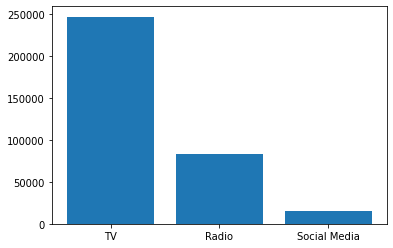

In [7]:
x = [i for i, _ in enumerate(type)]
y = type.sum()
plt.bar(x, y)
plt.xticks(x, type)

From the bar chart above we can conclude that most of the budget used by TV promotion. And there's a significant difference between TV and Social Media budget. Let's see how is the correlation between each channel budget and sales.

2. Correlation Between Each Channel and Sales

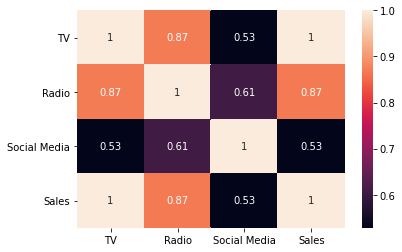

In [8]:
corr = data.corr()
sns.heatmap(corr, annot=True)
plt.show()

3. Dealing with Categorical Feature

<AxesSubplot:title={'center':'Sales'}, xlabel='Influencer'>

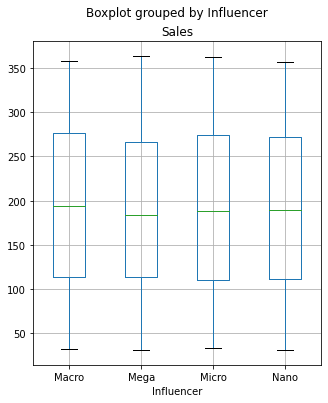

In [9]:
#influencer correlation with sales
data.boxplot('Sales','Influencer',figsize=(5,6))

In [10]:
#frequency distribution 
data['Influencer'].value_counts()

Mega     1158
Micro    1153
Nano     1139
Macro    1122
Name: Influencer, dtype: int64

#Encoding Categorical Data

In [11]:
#one-hot encoding
data_onehot = pd.get_dummies(data, columns=['Influencer'], prefix = ['Influencer'])
data_onehot.head()

,TV,Radio,Social Media,Sales,Influencer_Macro,Influencer_Mega,Influencer_Micro,Influencer_Nano
0,16.0,6.566231,2.907983,54.732757,0,1,0,0
1,13.0,9.237765,2.409567,46.677897,0,1,0,0
2,41.0,15.886446,2.913410,150.177829,0,1,0,0
3,83.0,30.020028,6.922304,298.246340,0,1,0,0
4,15.0,8.437408,1.405998,56.594181,0,0,1,0


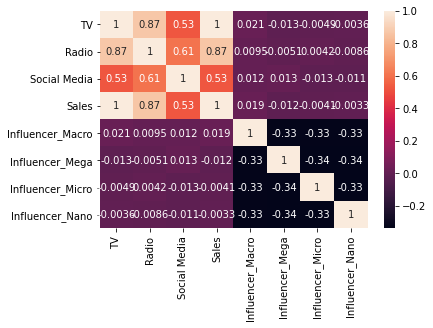

In [12]:
corrnew = data_onehot.corr()
sns.heatmap(corrnew, annot=True)
plt.show()

4. See the Most Sales Occur

In [13]:
data_onehot.nlargest(10, 'Sales')

,TV,Radio,Social Media,Sales,Influencer_Macro,Influencer_Mega,Influencer_Micro,Influencer_Nano
1925,100.0,42.225232,8.977117,364.079751,0,1,0,0
2823,100.0,32.148208,7.565100,362.042123,0,0,1,0
2412,100.0,34.488205,9.187200,360.400053,0,1,0,0
3338,100.0,32.735142,5.361312,360.109683,0,1,0,0
2314,100.0,27.779895,5.280721,359.038843,0,1,0,0
1408,100.0,34.369133,5.773973,358.897563,0,1,0,0
2378,100.0,28.656719,3.518440,358.420739,1,0,0,0
453,100.0,38.470629,5.793620,358.350539,1,0,0,0
3633,100.0,30.107064,8.054540,357.788195,0,1,0,0
2442,100.0,31.420838,2.924103,357.587130,0,0,1,0


## Sales Prediction

1. Data Cleaning

We want to drop missing value from the independent variable (sales), because we can't estimate the value to fill missing data. For other variable, we can use median or mode. 

In [14]:
#drop null in sales
missing = data_onehot[data_onehot['Sales'].isnull()].index
data_onehot = data_onehot.drop(missing, axis=0)

In [15]:
data_onehot['Sales'].isnull().sum()

0

In [16]:
#fill with median
col = ['TV','Radio','Social Media']

for i in col:
    data_onehot[i].fillna(data_onehot[i].median(), inplace = True)

In [17]:
data_onehot.isnull().sum()

TV                  0
Radio               0
Social Media        0
Sales               0
Influencer_Macro    0
Influencer_Mega     0
Influencer_Micro    0
Influencer_Nano     0
dtype: int64

2. Data Transformation

Check for the distribution of data before we can make a prediction model. ... that each variable has a normal distribution for better prediction model.

<AxesSubplot:xlabel='TV'>

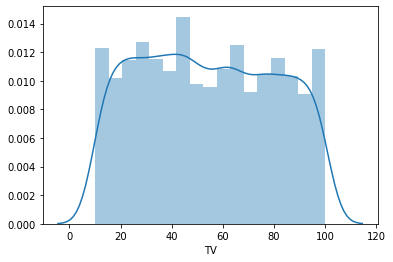

In [18]:
#cek distribution for each variable
numeric_val = data_onehot["TV"]
sns.distplot(numeric_val)

<AxesSubplot:xlabel='Radio'>

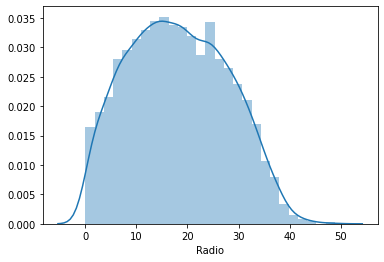

In [19]:
sns.distplot(data_onehot["Radio"])

<AxesSubplot:xlabel='Social Media'>

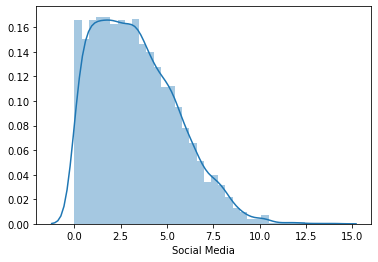

In [20]:
sns.distplot(data_onehot["Social Media"])

<AxesSubplot:xlabel='Sales'>

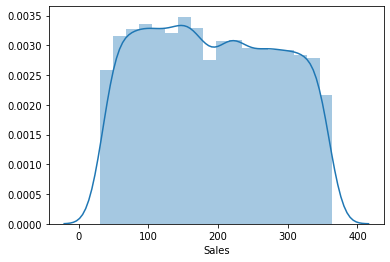

In [21]:
sns.distplot(data_onehot["Sales"])

<AxesSubplot:xlabel='Social Media'>

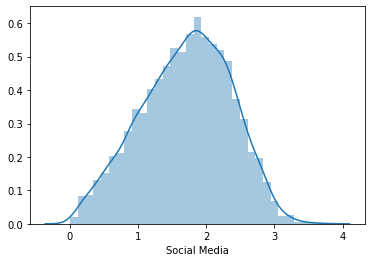

In [22]:
#social media not normally distributed
def sqrt_transform(data):
    return np.sqrt(data)
#transform social media data 
data_onehot['Social Media'] = np.sqrt(data_onehot['Social Media'])
sns.distplot(data_onehot["Social Media"])

3. Make Prediction Model

Start making a pediction model by divide dataset by training and testing data. We will use a Linear Regression algorithm for sales prediction.

In [51]:
#divide into training and testing
import numpy as np
from sklearn.model_selection import train_test_split

X = np.asarray(data_onehot[['TV', 'Radio', 'Social Media', 'Influencer_Macro', 'Influencer_Micro', 'Influencer_Mega', 'Influencer_Nano']])
Y = np.asarray(data_onehot['Sales'])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)

In [52]:
#make model standard linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

lineReg = LinearRegression()
lineReg.fit(X_train, y_train)

lr_predict = lineReg.predict(X_test)
print('Score: ', lineReg.score(X_test, y_test))
print('Weights: ', lineReg.coef_)
print("Mean Squarred Error:", mean_squared_error(y_test, lr_predict))

Score:  0.9988676543559605
Weights:  [ 3.49612625  0.20230294  0.16706436 -0.68345997  0.31965589  0.22901131
  0.13479276]
Mean Squarred Error: 10.046435322468417


In [53]:
#make model ridge regression
from sklearn import linear_model
reg = linear_model.Ridge (alpha = .5)
reg.fit(X_train, y_train)

lr_predict = lineReg.predict(X_test)

print('Score: ', reg.score(X_test, y_test))
print('Weights: ', reg.coef_)
print("Mean Squarred Error:", mean_squared_error(y_test, lr_predict))


Score:  0.9988676787112741
Weights:  [ 3.49612267  0.2023136   0.16697595 -0.68299704  0.31944119  0.22885589
  0.13469995]
Mean Squarred Error: 10.046435322468417


4. Test Prediction

In [55]:
lineReg.predict([[80,  20,  35,  1, 0, 0, 0]])

array([288.43094177])